In [70]:
import dataset
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
from PIL import Image
from matplotlib import pyplot as plt
import albumentations
%matplotlib inline
path = "/home/gianscarpe/dev/data/dhp19/time_count_dataset/movements_per_frame/"

In [71]:
from albumentations import *
from albumentations.pytorch import ToTensor

In [72]:
# Indexes
from utils.generate_indexes import load_npy_indexes_and_map
file_paths, train_index, val_index, test_index = load_npy_indexes_and_map(path)

LOADED INDEXES! train: 20267 	 val: 5067 	 test: 6334


In [76]:
data_index = np.concatenate([train_index, val_index])
print(data_index.shape)

(25334,)


In [88]:
transform_val = Compose([
    CenterCrop(224, 224),
             ToTensor()
       ])

In [89]:
d = dataset.get_dataset(file_paths, index=data_index, preload=False, n_channels=1, preprocess=transform_val)

In [90]:
#from https://discuss.pytorch.org/t/computing-the-mean-and-std-of-dataset/34949/2
loader = DataLoader(
    d,
    batch_size=32,
    num_workers=1,
    shuffle=False
)

## Mean and Std

In [80]:
mean = 0.
std = 0.
nb_samples = 0.
counts = torch.zeros(33)
for data, labels in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples
    for i in labels:
        counts[i]+=1

mean /= nb_samples
std /= nb_samples

In [81]:
print(f"Mean: {mean} | Std: {std}")

Mean: tensor([0.0074]) | Std: tensor([0.0553])


22

<BarContainer object of 33 artists>

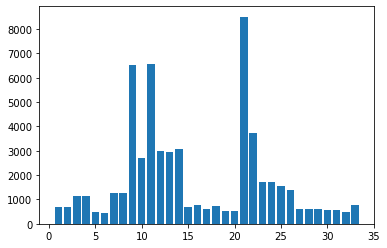

In [59]:
plt.bar(np.arange(1, 34), counts.numpy().astype('int'))

## Visually evaluate loader

In [61]:
np.save("count_per_class.npy", counts)

/home/gianscarpe/anaconda3/envs/event-camera/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


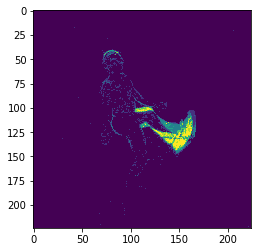

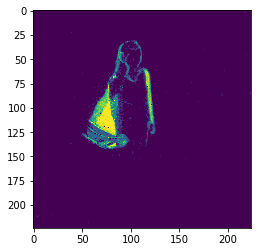

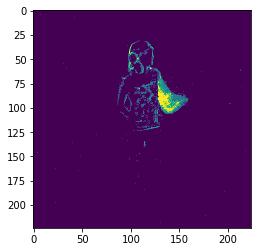

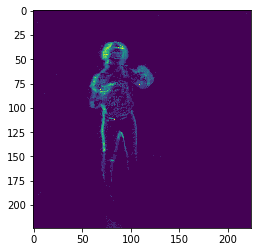

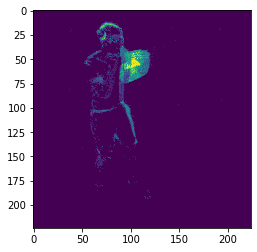

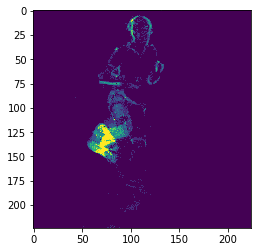

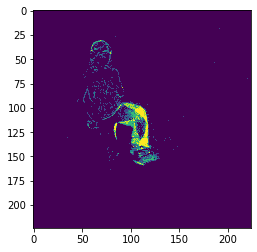

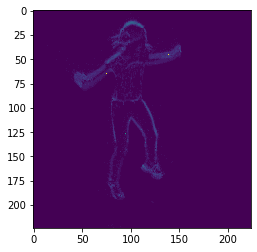

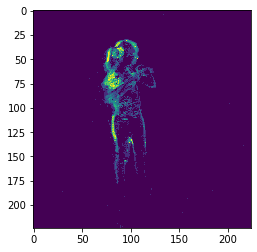

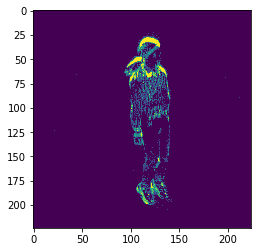

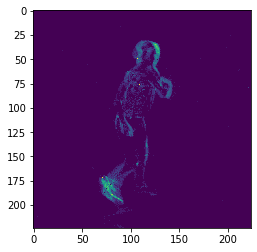

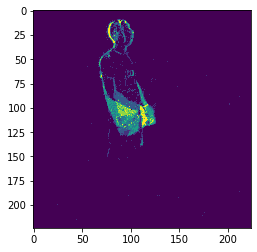

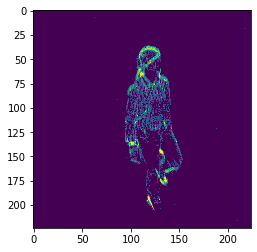

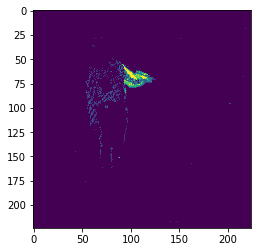

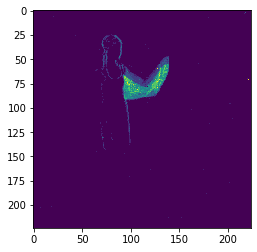

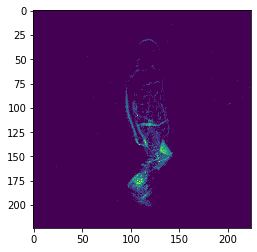

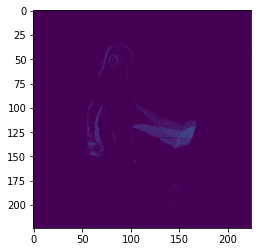

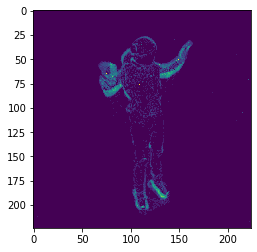

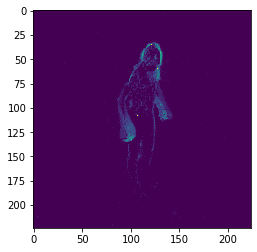

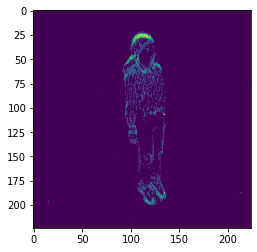

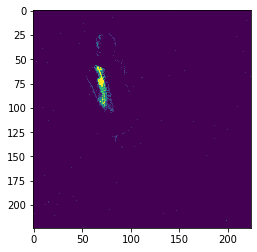

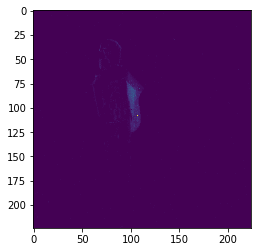

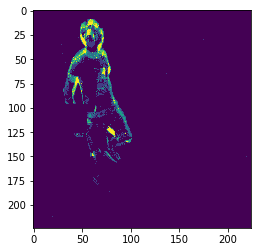

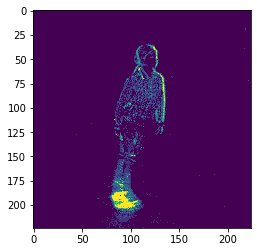

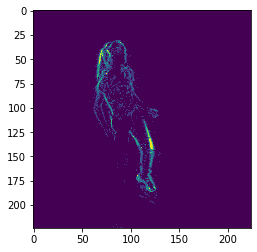

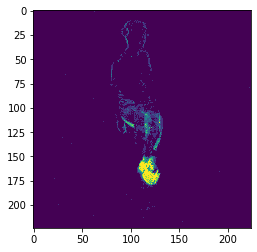

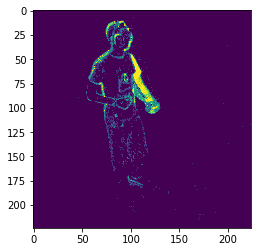

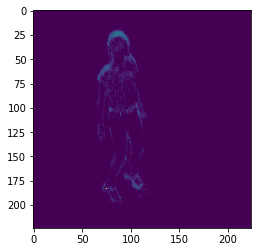

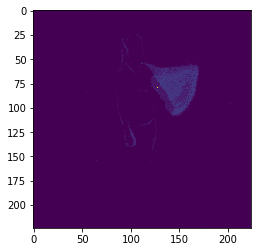

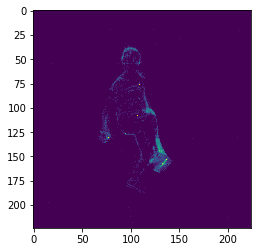

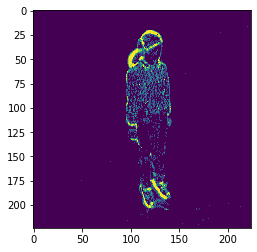

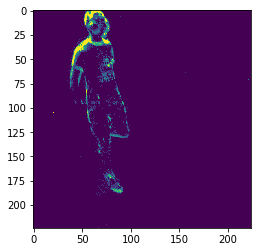

In [91]:
it = iter(loader)
b_x, b_y = next(it)
trans = transforms.ToPILImage()
for img, label in zip(b_x, b_y):
    img = trans(img)
    plt.figure()
    plt.imshow(img)

In [85]:
b_x.shape

torch.Size([32, 1, 260, 346])